<a href="https://colab.research.google.com/github/ali-77-gh/Data-Science/blob/main/students_marks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Investigation and modeling based on single variable simple linear regression to predict students' grades

In [51]:
import pandas as pd
from google.colab import  drive
import numpy as np

### ***🧾read data with pandas library and Check the table data***



In [12]:
data = pd.read_csv(r"/content/Student_Marks.csv")

In [15]:
data.head(5)

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [16]:
data.shape

(100, 3)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [19]:
data.columns

Index(['number_courses', 'time_study', 'Marks'], dtype='object')

In [22]:
data.describe()

,number_courses,time_study,Marks
count,100.000000,100.000000,100.000000
mean,5.290000,4.077140,24.417690
std,1.799523,2.372914,14.326199
min,3.000000,0.096000,5.609000
25%,4.000000,2.058500,12.633000
50%,5.000000,4.022000,20.059500
75%,7.000000,6.179250,36.676250
max,8.000000,7.957000,55.299000


In [23]:
data.dtypes

,0
number_courses,int64
time_study,float64
Marks,float64


In [24]:
data.isnull().sum()

,0
number_courses,0
time_study,0
Marks,0


## 🪶Now that I have checked the data, I go to the ***linear regression model(single variable)***




In [44]:
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *

In [55]:
x_train , x_test , y_train , y_test = train_test_split(data[['time_study']] , data[['Marks']] , test_size=0.3 , random_state=42)

In [56]:
#To check the correct distribution of data
print(x_train.count())
print(x_test.count())
print(y_train.count())
print(y_test.count())

time_study    70
dtype: int64
time_study    30
dtype: int64
Marks    70
dtype: int64
Marks    30
dtype: int64


In [57]:

lr = LinearRegression()
lr.fit(x_train , y_train)

LinearRegression()

In [58]:
y_pred_lr = lr.predict(x_test)        #\ predict with model

# **The results of the linear regression model**

In [63]:
print(f'mae = {mean_absolute_error(y_test , y_pred_lr)}')
print(f'mse = {mean_squared_error(y_test , y_pred_lr)}')
print(f'rmse = {np.sqrt(mse)}')
print(f'r2 = {r2_score(y_test , y_pred_lr)}')

mae = 3.77813649538505
mse = 21.989276290446124
rmse = 4.689272469205231
r2 = 0.9022638096775679


## ***💹Chart comparing actual and predicted values ​​with simple linear regression***


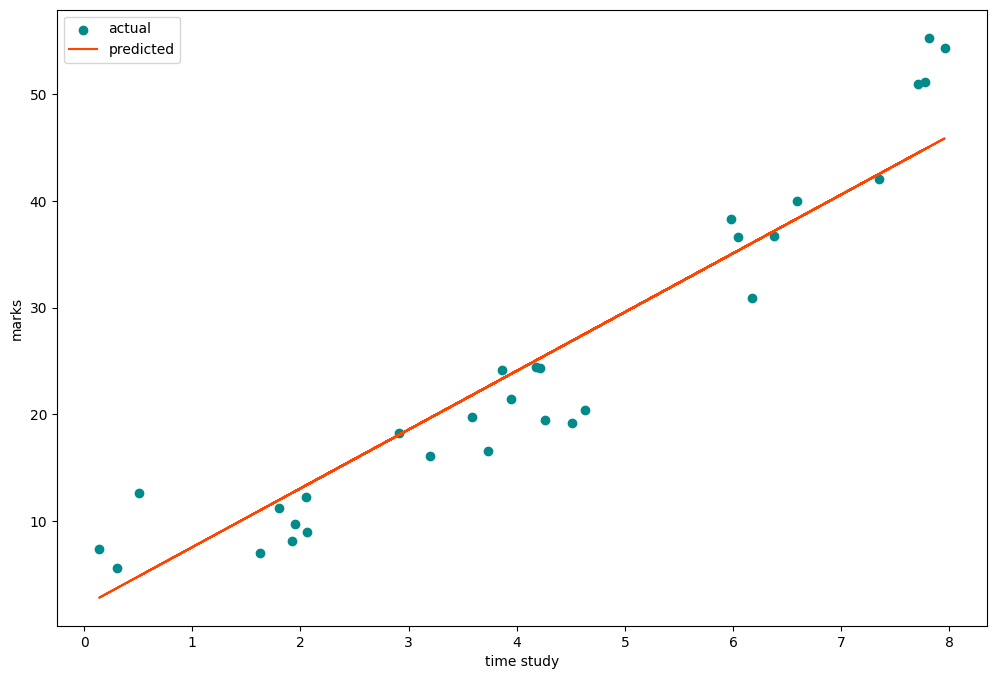

In [83]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.scatter(x_test , y_test , color='DarkCyan' , label='actual')
plt.plot(x_test , y_pred_lr , color ='OrangeRed' , label='predicted')
plt.xlabel("time study")
plt.ylabel("marks")

plt.legend()
